In [3]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
CitiesDB = pd.read_csv(city_data) 
RideDB = pd.read_csv(ride_data) 

# Combine the data into a single dataset
FullDB = RideDB.merge(CitiesDB, on='city', how='left')

# Display the data table for preview
FullDB.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


In [4]:
#Bubble Plot of Ride
UrbanDB = CitiesDB.loc[CitiesDB["type"]=='Urban',:]
UrbanDB.loc[:,'AvgFarePerCity'] = FullDB['fare'].groupby(FullDB['city']).transform('mean')
UrbanDB.loc[:,'RideCountPerCity'] = FullDB['date'].groupby(FullDB['city']).transform('count')
UrbanDB = UrbanDB.drop_duplicates(subset ="city") 
UrbanDB.head()

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,city,driver_count,type,AvgFarePerCity,RideCountPerCity
0,Richardfort,38,Urban,23.425833,24
1,Williamsstad,59,Urban,24.451613,31
2,Port Angela,67,Urban,25.642800,25
3,Rodneyfort,34,Urban,28.616957,23
4,West Robert,39,Urban,22.965263,19


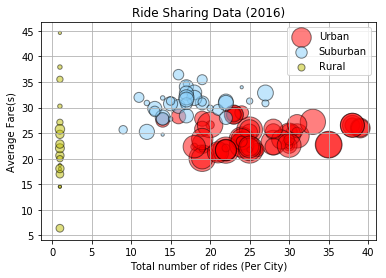

<Figure size 432x288 with 0 Axes>

In [14]:
# Obtain the x and y coordinates for each of the two city types left
SuburbanDB= FullDB.loc[FullDB["type"]=='Suburban',:]
SuburbanDB.loc[:,'AvgFarePerCity'] = FullDB['fare'].groupby(SuburbanDB['city']).transform('mean')
SuburbanDB.loc[:,'RideCountPerCity'] = FullDB['date'].groupby(SuburbanDB['city']).transform('count')
SuburbanDB = SuburbanDB.drop_duplicates(subset ="city") 
SuburbanDB.head()

RuralDB = CitiesDB.loc[CitiesDB["type"]=='Rural',:]
RuralDB.loc[:,'AvgFarePerCity'] = FullDB['fare'].groupby(RuralDB['city']).transform('mean')
RuralDB.loc[:,'RideCountPerCity'] = FullDB['date'].groupby(RuralDB['city']).transform('count')
RuralDB = RuralDB.drop_duplicates(subset ="city") 
RuralDB.head()

# Build the scatter plots for each city types
plt.scatter(UrbanDB['RideCountPerCity'], UrbanDB['AvgFarePerCity'], s=UrbanDB['driver_count']*10, 
            alpha=0.5, c='r', label='Urban', edgecolors='k')
plt.scatter(SuburbanDB['RideCountPerCity'], SuburbanDB['AvgFarePerCity'], s=SuburbanDB['driver_count']*10, 
            alpha=0.5, c='lightskyblue', label='Suburban', edgecolors='k')
plt.scatter(RuralDB['RideCountPerCity'], RuralDB['AvgFarePerCity'], s=RuralDB['driver_count']*10, 
            alpha=0.5, c='y', label='Rural', edgecolors='k')

# Incorporate the other graph properties
plt.grid()

# Create a legend
plt.title("Ride Sharing Data (2016)")
plt.xlabel("Total number of rides (Per City)")
plt.ylabel("Average Fare(s)")

# Incorporate a text label regarding circle size
plt.legend(loc='upper right')
plt.show()

# Save Figure
plt.savefig('Rides_2016.png')

# Show plot
plt.show()

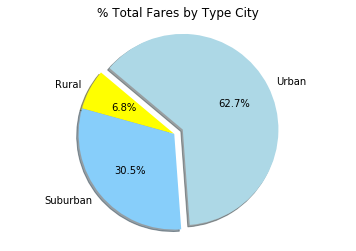

In [15]:
TPercentageFaresPerCity = (FullDB.groupby("type").sum()['fare'] * 100) / FullDB['fare'].sum()

colors = ["yellow",  "lightskyblue","Lightblue"]
explode = (0, 0, 0.1)
plt.pie(TPercentageFaresPerCity.tolist(), explode=explode, labels=TPercentageFaresPerCity.index.tolist(), colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% Total Fares by Type City")

plt.axis("equal")
plt.savefig("Total Fares by City Type.png")
plt.show()

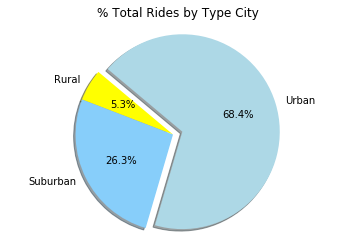

In [16]:
# Show Figure
plt.show()

#Rides per type
FullDB.head()
RidesPercentagePerCity = (FullDB.groupby("type").count()['ride_id'] * 100) / FullDB['ride_id'].count()
RidesPercentagePerCity

colors = ["yellow",  "lightskyblue","Lightblue"]
explode = (0, 0, 0.1)
plt.pie(RidesPercentagePerCity.tolist(), explode=explode, labels=RidesPercentagePerCity.index.tolist(), colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% Total Rides by Type City")

plt.axis("equal")
plt.savefig("Total Rides by City Type.png")
plt.show()

# Show Figure
plt.show()

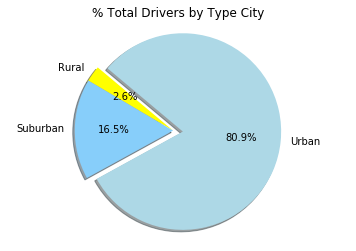

In [17]:
#Total Drivers by City Type
FullDB.head()
FullDB_ = FullDB.drop_duplicates(subset ="city") 
DriversPercentagePerCity = (FullDB_.groupby("type").sum()['driver_count'] * 100) / FullDB_['driver_count'].sum()

colors = ["yellow",  "lightskyblue","Lightblue"]
explode = (0, 0, 0.1)
plt.pie(DriversPercentagePerCity.tolist(), explode=explode, labels=DriversPercentagePerCity.index.tolist(), colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("% Total Drivers by Type City")

plt.axis("equal")
plt.savefig("Total Drivers by City Type.png")
plt.show()

# Show Figure
plt.show()